In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Titanic Data

In [272]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv("titanic_test.csv")
IDtest = test["PassengerId"]
train_len = len(train)
df =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

Data Preprocessing

In [273]:
def determine_age(cols):
    age = cols[0]
    pclass = cols[1]
    if np.isnan(age):
        if(pclass == 1):
            return 37
        elif(pclass==2):
            return 29
        else:
            return 24
    else:
        return age
    
df['Age'] = df[['Age','Pclass']].apply(determine_age,axis=1)

Get Cabin Initials as a new feature

In [274]:
def cabinletter (cabin):
    if pd.isnull(cabin):
        return 'x'
    else:
        return cabin[0]
    
##To Avoid Overfitting
#df['CabinInit'] = df['Cabin'].apply(cabinletter)

Get Title and Name length as 2 new feature

In [275]:
df['Title']= df['Name'].apply(lambda name:name.split('.')[0].split(',')[1].strip())

In [276]:
df['NameLength'] = df['Name'].apply(lambda name:len(name.strip()))

In [277]:
#df['Ticket_Lett'] = df['Ticket'].apply(lambda x: str(x)[0])
#df['Ticket_Lett'] = df['Ticket_Lett'].apply(lambda x: str(x))
#df['Ticket_Lett'] = np.where((df['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), df['Ticket_Lett'],
#                                  np.where((df['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
#                                            'Low_ticket', 'Other_ticket'))

In [278]:
def standardize_title(title):
    if title.lower() in ['mr','miss','mrs','master']:
        return title
    elif title.lower() in ['ms','mlle']:
        return 'Miss'
    elif title.lower() in ['mme']:
        return 'Mrs'
    else:
        return 'Rare'
df['Title'] = df['Title'].apply(standardize_title)

In [279]:
df['FamilySize'] = df[['Parch','SibSp']].apply(lambda cols:cols[0]+cols[1] +1,axis=1)

In [280]:
def normalizefare(cols):
    Ticket = cols[0]
    Fare = cols[1]
    pplinsameticket = len(df[df['Ticket'] == Ticket])   
    if(pplinsameticket > 1):
        Fare = Fare/pplinsameticket
    return Fare

In [281]:
 df['Fare'] = df[['Ticket','Fare']].apply(normalizefare,axis=1)

In [282]:
def FareCategory(Fare):
    if Fare >60:
        return 'High'
    elif Fare <= 60 and Fare >40:
        return 'Medium'
    else:
        return 'Low'

In [283]:
#df['FareCategory'] = df['Fare'].apply(FareCategory)

In [284]:
def GroupSurvival(ticket):
    GroupSurvival = 0
    if len(df[df['Ticket'] == ticket]) > 3:
        SurvivedInTicket = len(df[(df['Ticket'] == ticket) & (df['Survived'] == 1)])
        DeadInTicket = len(df[(df['Ticket'] == ticket) & (df['Survived'] == 0)])
        if(SurvivedInTicket+DeadInTicket > 2):
            GroupSurvival = SurvivedInTicket/(SurvivedInTicket + DeadInTicket)
    return GroupSurvival


def TravelInGroup(ticket):
    if len(df[df['Ticket'] == ticket]) > 3:
        return 1.0
    else:
        return 0.0

In [285]:
df['PartofGroup'] = df['Ticket'].apply(TravelInGroup)

In [286]:
#df['GroupSurvival'] = df['Ticket'].apply(GroupSurvival)

In [287]:
df.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,NameLength,FamilySize,PartofGroup
0,22.0,NaN,S,7.25000,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,23,2,0.0
1,38.0,C85,C,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,51,2,0.0


In [288]:
df['Fare'].fillna(0,inplace=True)

In [289]:
df['Embarked'].fillna('S',inplace=True)

In [290]:
df['FareBin'] = pd.qcut(df['Fare'], 4)

In [291]:
df['AgeBin'] = pd.cut(df['Age'].astype(int), 5)

In [292]:
df.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,NameLength,FamilySize,PartofGroup,FareBin,AgeBin
0,22.0,NaN,S,7.25000,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,23,2,0.0,"(-0.001, 7.55]","(16.0, 32.0]"
1,38.0,C85,C,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,51,2,0.0,"(15.0, 128.082]","(32.0, 48.0]"


In [293]:
df_dummies = pd.get_dummies(df[['Embarked','Title','Sex','FareBin','AgeBin']],drop_first=True) #,'CabinInit','FareCategory'
df = pd.concat([df,df_dummies], axis=1)
df.drop(labels = ['Embarked','Title','Sex','FareBin','AgeBin'],axis=1, inplace=True) #,'CabinInit','FareCategory'

In [294]:
df.drop(labels = ['Name','Ticket','Cabin'],axis=1, inplace=True )

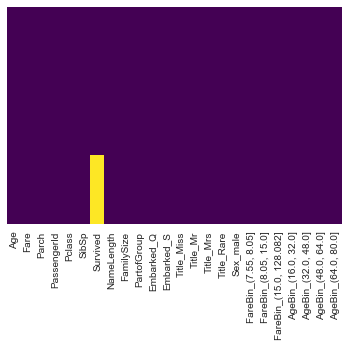

In [295]:
sns.heatmap(df.isnull(),annot=False, yticklabels=False,cbar=False,cmap='viridis')

In [296]:
df.head(2)

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,NameLength,FamilySize,PartofGroup,...,Title_Mrs,Title_Rare,Sex_male,"FareBin_(7.55, 8.05]","FareBin_(8.05, 15.0]","FareBin_(15.0, 128.082]","AgeBin_(16.0, 32.0]","AgeBin_(32.0, 48.0]","AgeBin_(48.0, 64.0]","AgeBin_(64.0, 80.0]"
0,22.0,7.25000,0,1,3,1,0.0,23,2,0.0,...,0,0,1,0,0,0,1,0,0,0
1,38.0,35.64165,0,2,1,1,1.0,51,2,0.0,...,1,0,0,0,0,1,0,1,0,0


In [297]:
train = df[:train_len]
test = pd.DataFrame.copy(df[train_len:], deep=True)

In [298]:
test.drop('PassengerId', axis=1, inplace =True)
test.drop('Survived', axis=1, inplace =True)

In [299]:
X = train.drop(labels= ['PassengerId','Survived'],axis=1)
y = train['Survived']

Check for Outlier

In [300]:
# 1st quartile (25%)
Q1 = np.percentile(df['Age'], 25)
# 3rd quartile (75%)
Q3 = np.percentile(df['Age'],75)
# Interquartile range (IQR)
IQR = Q3 - Q1
# outlier step
outlier_step = 1.5 * IQR

# Determine a list of indices of outliers for feature col
outlier_list_col = df[(df['Age'] < Q1 - outlier_step) | (df['Age'] > Q3 + outlier_step )].index

# There are outlier problem in titanic to deal , the above code is for reference

Modelling with common algorithms

In [301]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [302]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import classification,confusion_matrix

Try Stratified K Fold Cross validation 

In [303]:
kfold = StratifiedKFold(n_splits = 10,shuffle=False)

In [304]:
lrm = LogisticRegression()
lrm_param_grid = {"C":[.003,.01,.03,1,3,10],
                 }
lrmGS = GridSearchCV(lrm,param_grid = lrm_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
lrmGS.fit(X,y)
lrm_best = lrmGS.best_estimator_

lrmGS.best_score_

#CV_Result = cross_val_score(lrm,X,y, scoring='accuracy',cv=kfold)
#print(CV_Result.mean())
#print(CV_Result.std())

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   46.9s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   47.1s finished


0.82379349046015715

In [269]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.model_selection import ShuffleSplit,cross_validate


In [305]:
#Machine Learning Algorithm (MLA) Selection and initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_estimators = 100),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(n_neighbors = 3),
    
    #SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy Min' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)




D:\MachineLearn\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\MachineLearn\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\MachineLearn\Anaco

In [306]:
#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_compare.loc[row_index, 'MLA Name'] = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = cross_validate(alg, X, y, cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    MLA_compare.loc[row_index, 'MLA Test Accuracy Min'] = cv_results['test_score'].min()   #let's know the worst that can happen!

    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
#print(MLA_compare)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy Min,MLA Time
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.924532,0.826119,0.791045,0.148397
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.997378,0.824254,0.802239,0.270265
8,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.831835,0.822388,0.798507,0.0140631
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.835019,0.821642,0.791045,1.01559
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.856929,0.808582,0.779851,0.143102
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.974345,0.808209,0.779851,0.0390653
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.997378,0.801493,0.768657,0.0290458
15,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.997378,0.776866,0.753731,0.00625041
16,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.997378,0.764925,0.731343,0.00625038
11,GaussianNB,{'priors': None},0.772472,0.756343,0.664179,0.00468857


In [310]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1,3,5],
              "min_samples_split": [5],
              "min_samples_leaf": [10],
              "bootstrap": [False],
              "n_estimators" :[50,100,200],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X,y)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   55.5s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:  1.2min finished


0.83052749719416386

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [180]:
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = RFC_best.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

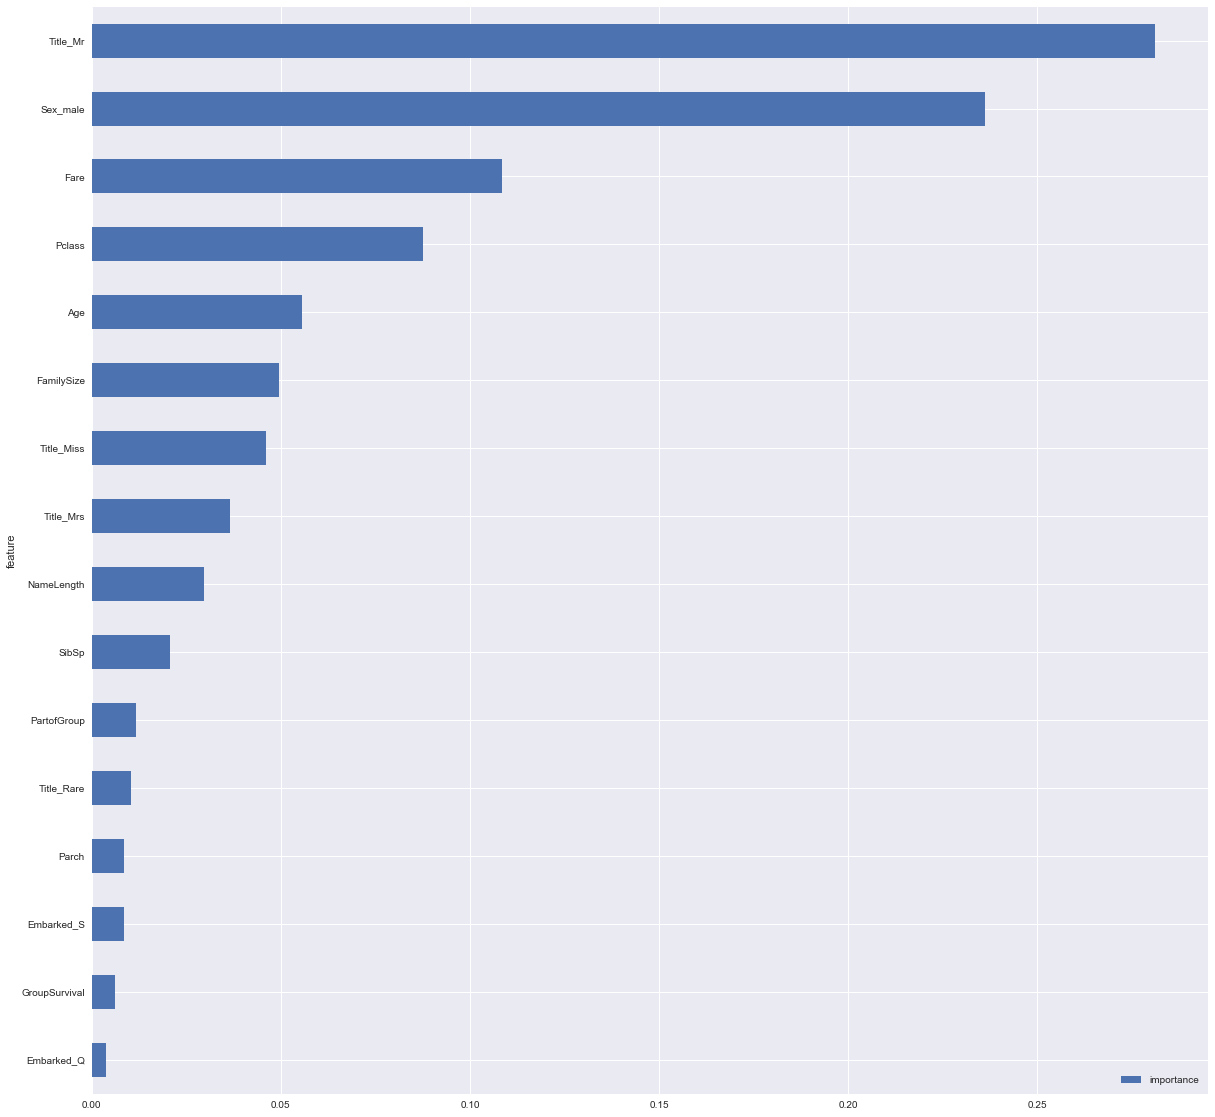

In [181]:
features.plot(kind='barh', figsize=(20, 20))

In [222]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(RFC_best, prefit=True)
train_reduced = model.transform(X)
train_reduced.shape

test_reduced = model.transform(test)
test_reduced.shape
#RFC_best = RandomForestClassifier(n_estimators=100, min_samples_leaf=10,min_samples_split=10,max_features=3, oob_score=True)

(418, 6)

array([[ 7.8292    ,  3.        ,  1.        ,  1.        ],
       [ 7.        ,  3.        ,  0.        ,  0.        ],
       [ 9.6875    ,  2.        ,  1.        ,  1.        ],
       ..., 
       [ 7.25      ,  3.        ,  1.        ,  1.        ],
       [ 8.05      ,  3.        ,  1.        ,  1.        ],
       [ 7.45276667,  3.        ,  0.        ,  1.        ]])

DTC = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X,y)
ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

In [311]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X,y)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  2.8min finished


0.82603815937149272

In [477]:
#GBC_best = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,max_depth=4,min_samples_leaf=100,max_features=0.3)

### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [50,100,200,300]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X,y)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

In [125]:
SVMC_best

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [478]:
#SVMC_best = SVC(probability=True, gamma=0.001,C=1000)

In [479]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#g = plot_learning_curve(gsSVMC.best_estimator_,"SVM learning curves",X,y,cv=kfold)

In [124]:
#g = plot_learning_curve(gsGBC.best_estimator_,"GB learning curves",X,y,cv=kfold)
RFC_best

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Ensembling more than one model

In [312]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('lrm', lrm_best),
('GBC', GBC_best)], voting='soft', n_jobs=4)

#votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('lrm', lrm_best),
#('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X, y)

In [313]:
pred = pd.Series(votingC.predict(test), name='Survived')

In [314]:
output = pd.concat([IDtest,pred.astype(int)], axis=1)

In [315]:
output.to_csv("Titanic_Viswa13.csv",index=False)

In [437]:
df[df['PassengerId'].apply(lambda id: True if id in(893,1231,1236,1251)else False)]

,Age,Parch,PassengerId,Pclass,SibSp,Survived,male,NameLength,Miss,Mr,Mrs,Rare,FamilySize,low,Q,S
892,47.0,0,893,3,1,NaN,0,32,0,0,1,0,2,1,0,1
1230,24.0,0,1231,3,0,NaN,1,21,0,0,0,0,1,1,0,0
1235,24.0,1,1236,3,1,NaN,1,35,0,0,0,0,3,1,0,1
1250,30.0,0,1251,3,1,NaN,0,51,0,0,1,0,2,1,0,1
